In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/uscities/uscities.csv
/kaggle/input/io/Teachers.csv
/kaggle/input/io/Donations.csv
/kaggle/input/io/Projects.csv
/kaggle/input/io/Resources.csv
/kaggle/input/io/Schools.csv
/kaggle/input/io/Donors.csv


In [2]:
teachers = pd.read_csv('/kaggle/input/io/Teachers.csv')
donations = pd.read_csv('/kaggle/input/io/Donations.csv')
projects = pd.read_csv('/kaggle/input/io/Projects.csv')
resources = pd.read_csv('/kaggle/input/io/Resources.csv')
schools = pd.read_csv('/kaggle/input/io/Schools.csv')
donors = pd.read_csv('/kaggle/input/io/Donors.csv')
cities = pd.read_csv('/kaggle/input/uscities/uscities.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



## Projects

In [3]:
# Extract Year and Month from date and create separate columns for them
projects['Year Posted'] = pd.DatetimeIndex(projects['Project Posted Date']).year
projects['Month Posted'] = pd.DatetimeIndex(projects['Project Posted Date']).month

In [4]:
# Display the first 5 row of projects table
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Year Posted,Month Posted
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11,2013,1
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN,2013,1
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22,2013,1
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06,2013,1
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01,2013,1


In [5]:
# Number of projects posted each month
num_projects_posted = projects.groupby(['Year Posted','Month Posted'])['Project ID'].count().reset_index()
num_projects_posted = num_projects_posted.rename(columns={'Project ID': 'Num Projects'})
num_projects_posted

,Year Posted,Month Posted,Num Projects
0,2013,1,7792
1,2013,2,8325
2,2013,3,7023
3,2013,4,5931
4,2013,5,6305
...,...,...,...
60,2018,1,27743
61,2018,2,20637
62,2018,3,39275
63,2018,4,41719


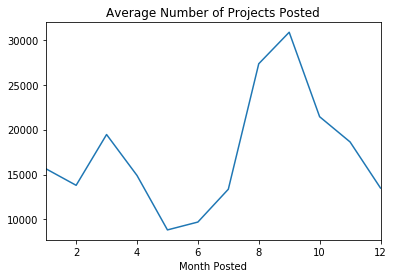

In [6]:
num_projects_posted.groupby('Month Posted')['Num Projects'].mean().plot.line(title='Average Number of Projects Posted')

In [7]:
# Number of Projects Funded Each Month
num_projects_funded = projects[projects['Project Current Status'] == 'Fully Funded'].groupby(['Year Posted','Month Posted'])['Project ID'].count().reset_index()
num_projects_funded = num_projects_funded.rename(columns={'Project ID': 'Num Projects'})
num_projects_funded

,Year Posted,Month Posted,Num Projects
0,2013,1,5684
1,2013,2,6067
2,2013,3,5050
3,2013,4,4300
4,2013,5,4415
...,...,...,...
60,2018,1,27454
61,2018,2,20474
62,2018,3,25033
63,2018,4,14570


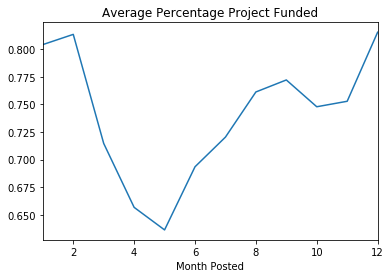

In [8]:
# Percentage of Project Funded Each Month
projects_merged = num_projects_posted.merge(num_projects_funded, 
                          left_on=['Year Posted', 'Month Posted'], 
                          right_on=['Year Posted', 'Month Posted'])\
                    .rename(columns={'Num Projects_x':'Num Posted',
                                    'Num Projects_y':'Num Funded'})

projects_merged['% Funded'] = projects_merged['Num Funded'] / projects_merged['Num Posted']

projects_merged.groupby('Month Posted')['% Funded'].mean().plot.line(title='Average Percentage Project Funded')

## What percentage of projects get funded

In [9]:
# Percentage of each statuses
status_percentage = projects.groupby('Project Current Status')['Project Current Status'].count() / projects['Project Current Status'].count()
status_percentage

Project Current Status
Expired         0.217476
Fully Funded    0.744821
Live            0.037703
Name: Project Current Status, dtype: float64

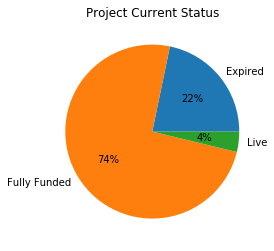

In [10]:
status_percentage.plot.pie(title='Project Current Status', label='', autopct='%1.0f%%')

## Percentage Free Lunch vs. Project Success Rate

In [11]:
merged = projects.merge(schools, left_on='School ID', right_on='School ID')

In [12]:
free_lunch = merged[merged['Project Current Status'] == 'Fully Funded'].groupby('School Percentage Free Lunch')['Project ID'].count() / merged.groupby('School Percentage Free Lunch')['Project ID'].count()

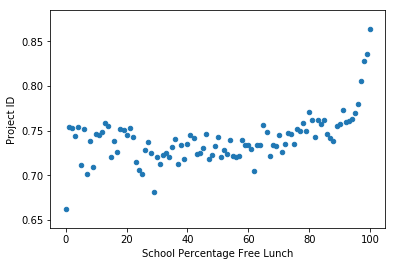

In [13]:
free_lunch.reset_index().plot.scatter('School Percentage Free Lunch', 'Project ID')

In [14]:
fig = px.scatter(x=free_lunch.reset_index()['School Percentage Free Lunch'],
                 y=free_lunch.reset_index()['Project ID'], 
                 trendline='ols')

fig.update_layout(title='Percentage of Fully Funded Projects',
                  xaxis_title='School Percentage Free Lunch',
                  yaxis_title='% of Total')
fig.update_traces(marker=dict(color='#7e57c2'), line=dict(color='#3801c0'))

fig.show()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [15]:
(merged.groupby(['School Percentage Free Lunch', 'Project Current Status'])['School Percentage Free Lunch'].count() / merged['School Percentage Free Lunch'].count())*100

School Percentage Free Lunch  Project Current Status
0.0                           Expired                   0.032517
                              Fully Funded              0.072281
                              Live                      0.004257
1.0                           Expired                   0.020652
                              Fully Funded              0.074999
                                                          ...   
99.0                          Fully Funded              0.213855
                              Live                      0.007790
100.0                         Expired                   0.033061
                              Fully Funded              0.284143
                              Live                      0.011866
Name: School Percentage Free Lunch, Length: 303, dtype: float64

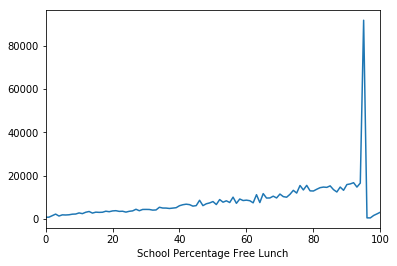

In [16]:
# number of projects fully funded for each percentage free lunch
pct_free_lunch = merged[merged['Project Current Status'] == 'Fully Funded'].groupby('School Percentage Free Lunch')['Project Current Status'].count()
pct_free_lunch.plot.line()

## Region/Geography

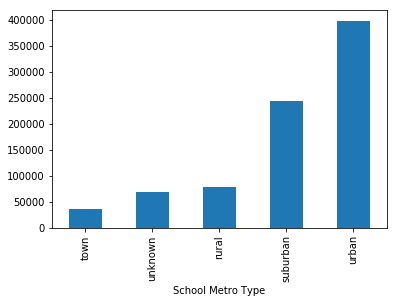

In [17]:
merged[merged['Project Current Status'] == 'Fully Funded'].groupby('School Metro Type')['Project ID'].count().sort_values().plot.bar()

## How quickly funded

In [18]:
projects = projects[projects['Project Current Status'] == 'Fully Funded'].sort_values('Project Fully Funded Date')

projects['Duration'] = pd.to_datetime(projects['Project Fully Funded Date']) - pd.to_datetime(projects['Project Posted Date'])
str(projects['Duration'].mean())

projects

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,...,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Year Posted,Month Posted,Duration
194,2299efb8faeb12a29ae0de25eff50073,1bb00e346c3788a1c90ad5408248b39d,ff141708fa635690cdd087976b75a6fc,18,Teacher-Led,"We Love Froggy, Junie B. Jones, Clifford, and ...",There are some characters who are just so char...,There are some characters who are just so char...,My students need books about our favorite char...,Literacy & Language,...,Grades PreK-2,Books,410.54,2013-01-01,2013-05-30,Fully Funded,2013-01-01,2013,1,0 days
87,4bb25472fe73026e610b635cd0642037,81a5ab1f688b70c3f0571a8b7f03588d,453b40cc9c22b7e11a41745e516941b8,1,Teacher-Led,"Getting Our ""Hands-On"" Math And Reading!","Each day, my 24 kindergarteners work diligentl...","Each day, my 24 kindergarteners work diligentl...",My students need games and manipulatives that ...,"Literacy & Language, Math & Science",...,Grades PreK-2,Supplies,1033.53,2013-01-01,2013-05-30,Fully Funded,2013-01-01,2013,1,0 days
28,ec7a0cfa371ac1d04b27658c461b45e6,3b4267536e8a0b00fda72a5dfdf94e11,d26dd92f2133fc789d118327ae3d0b5c,67,Teacher-Led,Creativity With Epson,My students are a fabulous group of high energ...,My students are a fabulous group of high energ...,My students need Epson Glossy Photo Paper and ...,"Literacy & Language, Music & The Arts",...,Grades 3-5,Supplies,300.88,2013-01-01,2013-05-30,Fully Funded,2013-01-01,2013,1,0 days
109,a0abab76da496e5e0cdef6e6aee81851,356752260b02eee75c4d773ba6f743f5,da12a915d40d596185920f68f0620893,3,Teacher-Led,Help My Scholars Learn Through Play,"Nothing is more frustrating for my students, t...","Nothing is more frustrating for my students, t...","My students need sight-word stamps, ink and se...","Literacy & Language, Math & Science",...,Grades PreK-2,Other,533.78,2013-01-01,2013-05-31,Fully Funded,2013-01-01,2013,1,0 days
172,de4b8f96bedc94569aca063fc305ce99,2d5f0c1afb9a382e0a5909f8d116180d,951735ae60423c7289ea9e8d935c9eab,5,Teacher-Led,Pack Up and Go,"In this technology savvy day and age, can you ...","In this technology savvy day and age, can you ...",My students need a modern overhead projector s...,"Literacy & Language, Math & Science",...,Grades PreK-2,Technology,613.75,2013-01-01,2013-05-30,Fully Funded,2013-01-01,2013,1,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108526,a88648bb891342e249edaa0a01223a2f,453e76958164a9157c8e95829471fffb,cbedcd8a601ac953400ed6890f59df19,6,Professional Development,Filling My Literacy Toolbox at The National Re...,"My third, fourth, and fifth grade studen...","My third, fourth, and fifth grade students are...",I need to attend the National Reading Recovery...,Literacy & Language,...,Grades 3-5,Trips,698.02,2018-04-30,2018-05-31,Fully Funded,2018-05-11,2018,4,11 days
1060766,c411179a54153c2316efe238cd35e198,b6d35f7e5f443d5e4333d07348b5dd5e,a23997f8f9c41a055d4ecc160940d440,4,Teacher-Led,Real Books for All,This class is made up of 30 fourth graders at ...,This class is made up of 30 fourth graders at ...,My students need a more diverse selection of b...,Literacy & Language,...,Grades 3-5,Books,282.65,2018-03-30,2018-07-28,Fully Funded,2018-05-11,2018,3,42 days
1108538,72195a888aae493580a79c1779c7460e,561c1ff3057c5c50a5739f19dfdcfdcb,99117921081c985cd98307c702e43f0c,2,Teacher-Led,Let's Make Math Fun,Our school is a large public school with over ...,Our school is a large public school with over ...,My students need fun and hands on math games a...,Math & Science,...,Grades PreK-2,Educational Kits & Games,389.42,2018-04-30,2018-07-28,Fully Funded,2018-05-11,2018,4,11 days
1095977,b9cdcb6a0e42c617a2618e5804444a03,8b8c629fd5e3681e12f6a675773b55ca,63126c5628921dbaffbcc6f505491182,2,Teach

In [19]:
str(projects['Duration'].mean())

'32 days 01:52:26.871418'